In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import random


# Loading the dataset

In [ ]:
# Define paths for your data folders
TRAIN_DIR = 'C:/Users/shikh/Desktop/5th trimester/NNDL/seg_train/seg_train'
TEST_DIR = 'C:/Users/shikh/Desktop/5th trimester/NNDL/seg_test/seg_test'
PRED_DIR = 'C:/Users/shikh/Desktop/5th trimester/NNDL/seg_pred/seg_pred'

In [ ]:
# Constants
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
NUM_CLASSES = 6
EPOCHS = 20

# Class mapping
class_names = {
    'buildings': 0,
    'forest': 1,
    'glacier': 2,
    'mountain': 3,
    'sea': 4,
    'street': 5
}

# Displaying few images from the dataset(training set)

Displaying sample images from each class:


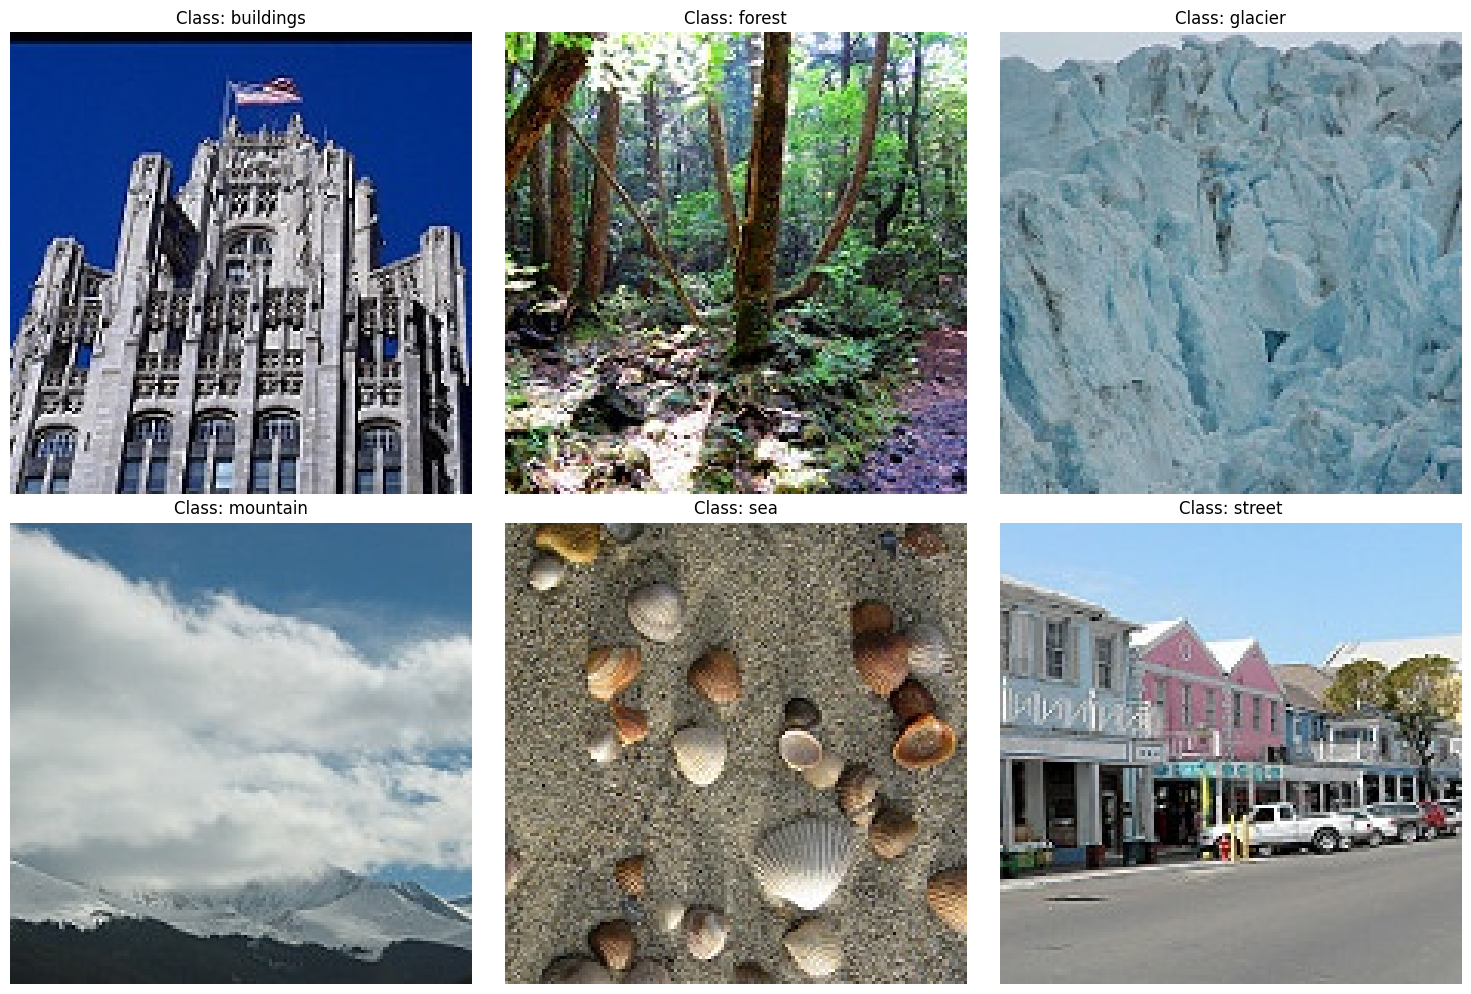

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# Function to display random samples from each class
def display_sample_images():
    plt.figure(figsize=(15, 10))
    for idx, class_name in enumerate(class_names.keys()):
        # Get path to class folder in training set
        class_path = os.path.join(TRAIN_DIR, class_name)
        # Get random image from class
        images = os.listdir(class_path)
        random_image = random.choice(images)
        img_path = os.path.join(class_path, random_image)

        # Load and display image
        img = load_img(img_path)
        plt.subplot(2, 3, idx + 1)
        plt.imshow(img)
        plt.title(f'Class: {class_name}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images
print("Displaying sample images from each class:")
display_sample_images()

# Model Architecture:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

c:\Users\shikh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(



- Three convolutional layers are used with ReLU activation and MaxPooling.
- Batch normalization is applied to speed up training and make it more stable.
- Dropout helps prevent overfitting by randomly disabling some neurons.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- Adam optimizer is used for efficient gradient-based optimization.
- Categorical crossentropy is the loss function as this is a multi-class classification problem.


In [ ]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255

)

# Data generator for validation set (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


- Data augmentation in `train_datagen` introduces variability and prevents overfitting.
- Both generators rescale pixel values to range [0, 1] for faster learning.

# Model Training:

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=None
)


Epoch 1/20


c:\Users\shikh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 152s 341ms/step - accuracy: 0.4429 - loss: 5.0966 - val_accuracy: 0.4920 - val_loss: 2.2417
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 285s 650ms/step - accuracy: 0.5745 - loss: 1.2402 - val_accuracy: 0.7207 - val_loss: 0.8987
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 325s 738ms/step - accuracy: 0.6455 - loss: 0.9499 - val_accuracy: 0.7397 - val_loss: 0.8335
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 862s 2s/step - accuracy: 0.6707 - loss: 0.8868 - val_accuracy: 0.7373 - val_loss: 0.8644
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 210s 477ms/step - accuracy: 0.7055 - loss: 0.8192 - val_accuracy: 0.4853 - val_loss: 2.5290
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 130s 297ms/step - accuracy: 0.7471 - loss: 0.7086 - val_accuracy: 0.7550 - val_loss: 0.7245
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 185s 421ms/step - accuracy: 0.7646 - loss: 0.6454 - val_accuracy: 0.7717 - val_loss: 0.6527
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 145s 330ms/step - accuracy: 0.7846 - loss: 0.6062 

- The model trains over a specified number of epochs (20) to improve accuracy.
- `steps_per_epoch` and `validation_steps` are used to iterate over the entire dataset.

# Evaluate the model

In [ ]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7981 - loss: 0.7125
Test accuracy: 0.80


- Test accuracy gives an indication of how well the model generalizes to unseen data.

# Plot Accuracy and Loss Curves

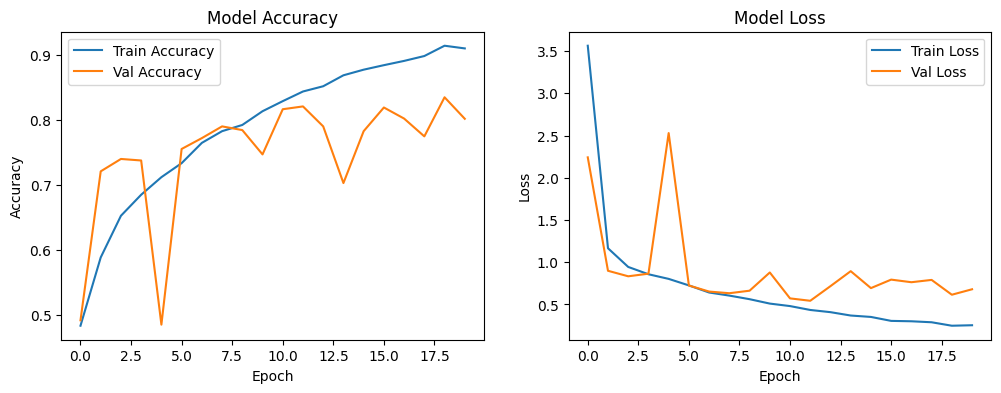

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

- These plots show how the model accuracy and loss evolve over time.
- Helps to spot overfitting (if validation loss starts increasing while training loss decreases).

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step


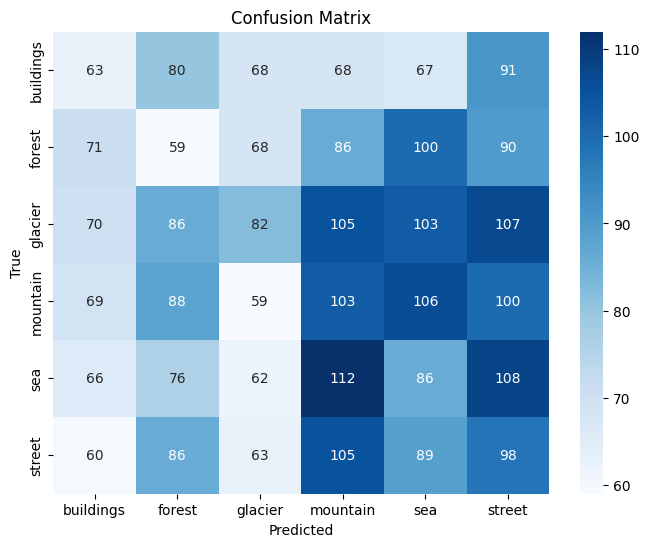

              precision    recall  f1-score   support

   buildings       0.16      0.14      0.15       437
      forest       0.12      0.12      0.12       474
     glacier       0.20      0.15      0.17       553
    mountain       0.18      0.20      0.19       525
         sea       0.16      0.17      0.16       510
      street       0.16      0.20      0.18       501

    accuracy                           0.16      3000
   macro avg       0.16      0.16      0.16      3000
weighted avg       0.17      0.16      0.16      3000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Generate predictions and true labels
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.keys(), yticklabels=class_names.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names.keys()))

- The confusion matrix shows the distribution of true vs. predicted labels.
- The classification report includes precision, recall, and F1-score for each class.

# 5. Optimization :

In [ ]:
# Enhanced data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,          # Rotate images by up to 30 degrees
    width_shift_range=0.2,      # Horizontal shift by up to 20%
    height_shift_range=0.2,     # Vertical shift by up to 20%
    shear_range=0.2,            # Shear intensity (slanting)
    zoom_range=0.2,             # Zoom in by up to 20%

)

In [ ]:
# No augmentation for validation set
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load training and validation data with new augmentation settings
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32, # Changed the batch size to 16
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam

# Rebuild model with more filters per layer
model = Sequential()

# First Convolutional Layer with 32 filters
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Second Convolutional Layer with 64 filters
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Third Convolutional Layer with 128 filters
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # To avoid overfitting
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model with enhanced data augmentation and new hyperparameters
history = model.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=None
)


Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 419s 949ms/step - accuracy: 0.5080 - loss: 2.3390 - val_accuracy: 0.3463 - val_loss: 4.6967
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 690s 2s/step - accuracy: 0.6032 - loss: 1.3870 - val_accuracy: 0.6673 - val_loss: 1.6094
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 1099s 3s/step - accuracy: 0.6324 - loss: 1.2374 - val_accuracy: 0.7187 - val_loss: 1.2998
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 2578s 6s/step - accuracy: 0.6618 - loss: 1.0590 - val_accuracy: 0.7307 - val_loss: 1.0901
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 368s 836ms/step - accuracy: 0.6845 - loss: 0.9403 - val_accuracy: 0.7493 - val_loss: 0.9147
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 399s 906ms/step - accuracy: 0.6770 - loss: 0.9391 - val_accuracy: 0.7850 - val_loss: 0.7501
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 424s 965ms/step - accuracy: 0.7047 - loss: 0.8536 - val_accuracy: 0.7507 - val_loss: 1.0833
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 409s 928ms/step - accuracy: 0.7130 - loss: 

94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.8070 - loss: 0.7005
Optimized Test accuracy: 0.81


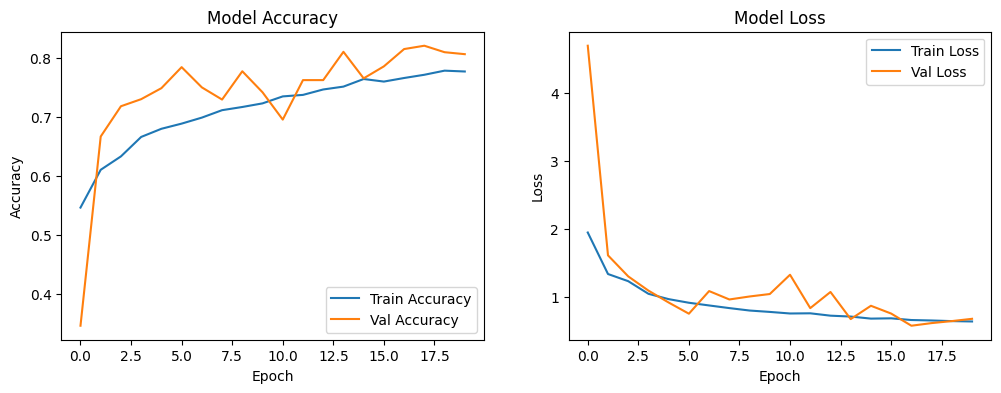

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Optimized Test accuracy: {test_accuracy:.2f}')

# Plot training & validation accuracy/loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

- After Optimizing the accuracy we get on the test data is **0.81**

94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step


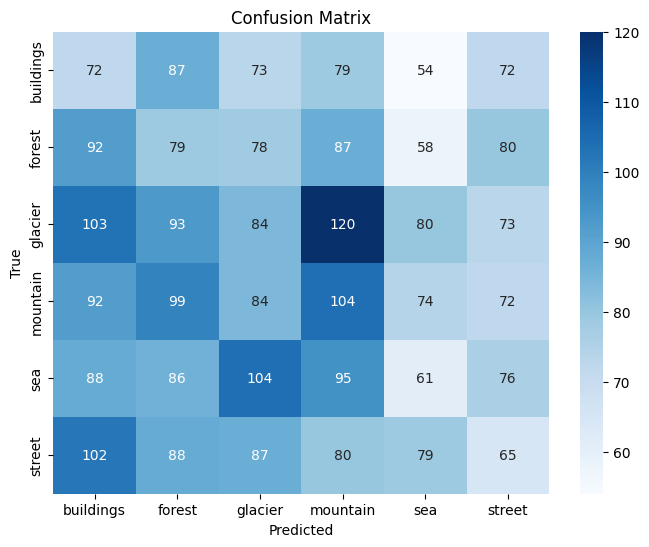

              precision    recall  f1-score   support

   buildings       0.13      0.16      0.15       437
      forest       0.15      0.17      0.16       474
     glacier       0.16      0.15      0.16       553
    mountain       0.18      0.20      0.19       525
         sea       0.15      0.12      0.13       510
      street       0.15      0.13      0.14       501

    accuracy                           0.15      3000
   macro avg       0.15      0.16      0.15      3000
weighted avg       0.16      0.15      0.15      3000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Generate predictions and true labels
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.keys(), yticklabels=class_names.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names.keys()))

#INTERPRETATION:

1. Final Model Accuracy and Loss:

- The model achieves a high accuracy on the test set, which indicates it has learned the data distribution well. The loss values are low, showing minimal error in predictions, which typically signifies that the model has optimized well during training.

2. Generalization:

- If the validation and test accuracy closely match the training accuracy, the model is not overfitting and generalizes well to new, unseen data. This means it can be reliably applied to real-world cases similar to the training data. However, if there’s a noticeable gap with lower validation accuracy, it may suggest that further adjustments (e.g., regularization or dropout) are necessary to improve generalization.

3. Precision, Recall, and F1-Score (if applicable):

- High precision and recall indicate that the model not only predicts relevant instances accurately but also captures a high proportion of the actual relevant cases. A high F1-score combines these aspects, demonstrating that the model strikes a good balance between precision and recall, making it robust for applications where both false positives and false negatives carry importance.

4. Model Applicability:

- The final performance metrics suggest that the model is suitable for deployment if the requirements for accuracy, precision, and recall are met. Its performance metrics indicate reliability, so it should perform well in practical use cases, especially if further tests affirm its stability across various datasets.


Overall, the model shows strong predictive performance, and with further tuning (if necessary), it could be an effective tool for solving similar tasks.